In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [293]:
import matplotlib.pyplot as plt
import numpy as np


class Model:
    """Модель парной линейной регрессии"""

    def __init__(self):
        # Коэффиценты регрессии
        self.b0 = 0
        self.b1 = 0
        # Пограшности при обучении
        self.errors = []

    def predict(self, x):
        # Предсказывание y на основе модели
        return self.b0 + self.b1 * x

    def error(self, x, y):
        return sum(((self.predict(x) - y) ** 2) / (2 * len(x)))

    def fit(self, X, Y=None, accuracy=0.01, min_steps=0, alpha=0.7, max_steps=50_000):
        # Обучение завершается само, если ошибка умешьшается меньше, чем accuracy
        # Обучение будет завершаться всегда, тк. есть максимальное кол-во шагов

        # Если было передано только одно значение, считаем что это DataFrame
        if Y is None:
            # Берем первые две колонки DF
            xn, yn = X.columns[:2]
            Y = X[yn]
            X = X[xn]
        self.X = X
        self.Y = Y
        steps = 0
        errors = []
        # Условия завершения (или):
        # Сделано максимальное количество шагов
        # Ошибка практически перестала рости (и сделано минимальное количество шагов)
        while (
            (len(errors) < 2)
            or (errors[-2] - errors[-1] > accuracy)
            or steps < min_steps
        ) and steps < max_steps:
            dJ0 = (self.predict(X) - Y).mean()
            dJ1 = ((self.predict(X) - Y) * X).mean()
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            steps += 1
            errors.append(self.error(X, Y))

            # Если у нас есть хотябы две известные ошибки
            if len(errors) > 1:
                # И если ошибки возрастают
                if errors[-1] > errors[-2]:
                    # Уменьшаем скорость обучения
                    # И сбрасываем результаты обучения
                    alpha /= 2
                    errors = []
                    self.b0 = self.b1 = 0
                    steps = 0
        self.errors = errors


    def draw_graph(self):
        # Создаем фигуры
        fig, ax = plt.subplots()
        # Определяем начала и конец отрезка
        X0 = np.linspace(min(self.X), max(self.X), 100)
        Y0 = self.predict(X0)
        # Отрисовываем имеющиеся данные
        ax.scatter(self.X, self.Y)
        # Отрисовыааем результаты обучения
        ax.plot(X0, Y0, "r")
        fig.show()

In [10]:
x1 = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y1 = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

HTTPError: HTTP Error 404: Not Found

In [7]:
x2 = np.array([1,2,3,4,9,5,6,6,6,7,8,9])
y2 = np.array(range(len(x2)))

In [4]:
from Objects import Model, Model2

3.0
2.85
2.6999999999999997
2.5500000000000003
2.4
2.25
2.0999999999999996
1.9500000000000002
1.7999999999999998
1.6500000000000004


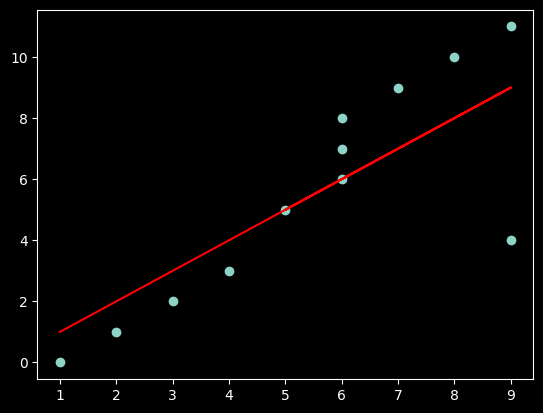

In [20]:
# Создаем и обучаем модель
hyp = Model2()
hyp.fit(x2, y2, accuracy=0.0001)
plt.scatter(x2, y2)
plt.plot(x2, hyp.predict(x2), 'r')

C:\Users\DaSh-More\AppData\Local\Temp\ipykernel_34636\17851091.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


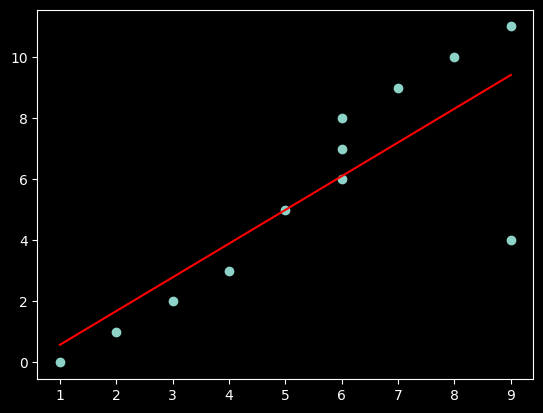

In [294]:
# Создаем и обучаем модель на других значениях
hyp = Model()
hyp.fit(x2, y2, accuracy=0.0001)
hyp.draw_graph()

C:\Users\DaSh-More\AppData\Local\Temp\ipykernel_34636\2120203986.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


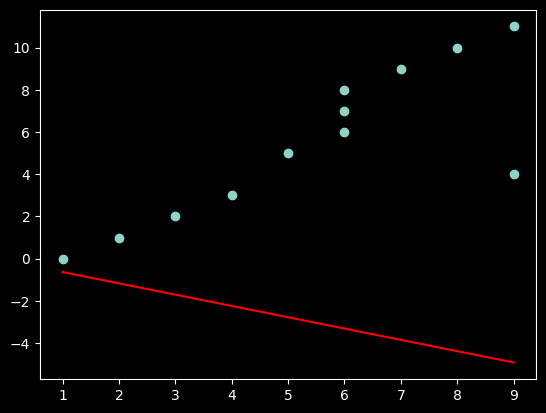

In [282]:
# При alpha = 0.06 на этих данных результат начинает расходиться
hyp = Model()
hyp.fit(x2, y2, accuracy=0.0001, alpha=0.06)
hyp.draw_graph()

In [283]:
# Создаем DataFrame
df = pd.DataFrame({'иксы': x1, 'игрики':y1})
df

,иксы,игрики
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673
5,-0.611756,-42.326026
6,0.319039,22.073585
7,-0.761207,-52.666163
8,0.582815,40.323651
9,-1.099891,-76.098960


In [1]:
# Создаем и обучаем модель на основе DataFrames
hyp = Model()
hyp.fit(df, accuracy=0.0001)
hyp.draw_graph()

NameError: name 'Model' is not defined